# 1. Preparation and Overview
### Business Case
Class to predict: Target (Dropout, Enrolled, Graduate)

Dataset Source: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

This data set was made with the intention to predict and prevent studen dropouts and failures in higher education. The data contains basic information about the student and their parents, including socio-economic and demographic information. Our model aims to predict whether a student will **dropout**, **continue enrollment**, or **graduate** from their program.

Using this data, we aim to identify factors that may be correlated to an increased probability of a student dropping out and/or failing out of college or university. It would also be useful to identify which factors may indicate a higher probability of student success. If the factors are something in the student's control, these results can be used by employees in higher education to help students who may be at a higher risk of leaving higher education prematurely. The results could also be used by various non-profits and tutoring companies to aid students who are high risk.

Colleges and universities could use this data to increase retention rates. SMU, specifically the Lyle School of Engineering, could utilize this data to make efforts in The Recruitment and Retention Office more effective.

This model will be most useful if it is deployed and frequently retrained. If we're able to collect more data as time goes on, we may notice different trends in which variables tend to be stronger indicators of a student's target status. For example, if the inflation rate is high certain years, that may be a strong predictor of the studen'ts target, but if inflation has decreased, other variables may be more important when determining the student's status. The model should be consistently retrained to keep it as up to date and as accurate as possible.

Measure of Reliability
https://ieeexplore.ieee.org/document/10056943

In this article, the researchers sought to predict student performance in higher education. In the literature review section, they referenced multiple other studies that had been done using machine learning. A few of those descriptions included the accuracy of the prediciton models used; in the first, the accuracy was 76.37-82.39%, and on the second, there was an accuracy of 74%. Based on these results, our prediction algorithm should have an accuracy of 75% or greater to be on par with other pre-existing machine learning models.

### Data Definition and Preparation
We removed the following features from the dataset: 
- **Application mode**- This variable indicated how the student applied to the school/course. This likely does not have an impact on the target variable, particularly when there are more significant variables in the dataset, so we removed it.
- **Application order**- This variable indicated how the applicant ranked their school/course choices, with 0 being their first choice and 9 being their last choice. This could potentially play a role in indicating the target variable, but other factors will likely have a more significant impact.
- **Curricular units 1st sem (credited), Curricular units 1st sem (evaluations), Curricular units 1st sem (approved), Curricular units 1st sem (without evaluations), Curricular units 2nd sem (credited), Curricular units 2nd sem (evaluations), Curricular units 2nd sem (approved), Curricular units 2nd sem (without evaluations)**- We decided that these variables were safe to be removed because we kept the enrolled curricular units and their respective grades.
- **Age at enrollment**- Other variables can give us similar information to this one. Things like marital status can be an indicator of age, and will likely have more of a weight on the student's status than their age.

In [20]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('data.csv')

df['Student_Status'] = df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}).fillna(-1)
#remove unwanted columns
drop_columns = ['Application mode', 'Application order','Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Age at enrollment']
df = df.drop(drop_columns, axis=1)
# Combine the last 3 features into a single 'Student_Status' column
df['Student_Status'] = df['Target'].map({'Dropout': 0, 'Graduate': 1, 'Enrolled': 2}).fillna(-1)
df = df.drop('Target', axis=1)

print(f"New DF: {df}")

attr_des = pd.DataFrame()
attr_des['Features'] = df.columns
# Description taken directly from dataset website https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
attr_des['Description'] = [ # Marital status
                            '1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated',
                           # Courses
                           '33 - Biofuel Production Technologies 171 - Animation and Multimedia Design 8014 - Social Service (evening attendance) 9003 - Agronomy 9070 - Communication Design 9085 - Veterinary Nursing 9119 - Informatics Engineering 9130 - Equinculture 9147 - Management 9238 - Social Service 9254 - Tourism 9500 - Nursing 9556 - Oral Hygiene 9670 - Advertising and Marketing Management 9773 - Journalism and Communication 9853 - Basic Education 9991 - Management (evening attendance)',
                            # Daytime/evening attendance
                            '1 - daytime 0 - evening',
                            # Previous qualification
                            '1 - Secondary education 2 - Higher education - bachelors degree 3 - Higher education - degree 4 - Higher education - masters 5 - Higher education - doctorate 6 - Frequency of higher education 9 - 12th year of schooling - not completed 10 - 11th year of schooling - not completed 12 - Other - 11th year of schooling 14 - 10th year of schooling 15 - 10th year of schooling - not completed 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 42 - Professional higher technical course 43 - Higher education - master (2nd cycle)',
                            # Previous qualification (grade)
                            'Grade of previous qualification (between 0 and 200)',
                            # Nacionality
                            '1 - Portuguese; 2 - German; 6 - Spanish; 11 - Italian; 13 - Dutch; 14 - English; 17 - Lithuanian; 21 - Angolan; 22 - Cape Verdean; 24 - Guinean; 25 - Mozambican; 26 - Santomean; 32 - Turkish; 41 - Brazilian; 62 - Romanian; 100 - Moldova (Republic of); 101 - Mexican; 103 - Ukrainian; 105 - Russian; 108 - Cuban; 109 - Colombian',
                            # Mother's qualification
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 22 - Technical-professional course 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            # Father's qualification
                            '1 - Secondary Education - 12th Year of Schooling or Eq. 2 - Higher Education - Bachelor''s Degree 3 - Higher Education - Degree 4 - Higher Education - Master''s 5 - Higher Education - Doctorate 6 - Frequency of Higher Education 9 - 12th Year of Schooling - Not Completed 10 - 11th Year of Schooling - Not Completed 11 - 7th Year (Old) 12 - Other - 11th Year of Schooling 13 - 2nd year complementary high school course 14 - 10th Year of Schooling 18 - General commerce course 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 20 - Complementary High School Course 22 - Technical-professional course 25 - Complementary High School Course - not concluded 26 - 7th year of schooling 27 - 2nd cycle of the general high school course 29 - 9th Year of Schooling - Not Completed 30 - 8th year of schooling 31 - General Course of Administration and Commerce 33 - Supplementary Accounting and Administration 34 - Unknown 35 - Can''t read or write 36 - Can read without having a 4th year of schooling 37 - Basic education 1st cycle (4th/5th year) or equiv. 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 39 - Technological specialization course 40 - Higher education - degree (1st cycle) 41 - Specialized higher studies course 42 - Professional higher technical course 43 - Higher Education - Master (2nd cycle) 44 - Higher Education - Doctorate (3rd cycle)',
                            # Mother's occupation
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 122 - Health professionals 123 - teachers 125 - Specialists in information and communication technologies (ICT) 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 171 - Skilled construction workers and the like, except electricians 173 - Skilled workers in printing, precision instrument manufacturing, jewelers, artisans and the like 175 - Workers in food processing, woodworking, clothing and other industries and crafts 191 - cleaning workers 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants',
                            # Father's occupation
                            '0 - Student 1 - Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers 2 - Specialists in Intellectual and Scientific Activities 3 - Intermediate Level Technicians and Professions 4 - Administrative staff 5 - Personal Services, Security and Safety Workers and Sellers 6 - Farmers and Skilled Workers in Agriculture, Fisheries and Forestry 7 - Skilled Workers in Industry, Construction and Craftsmen 8 - Installation and Machine Operators and Assembly Workers 9 - Unskilled Workers 10 - Armed Forces Professions 90 - Other Situation 99 - (blank) 101 - Armed Forces Officers 102 - Armed Forces Sergeants 103 - Other Armed Forces personnel 112 - Directors of administrative and commercial services 114 - Hotel, catering, trade and other services directors 121 - Specialists in the physical sciences, mathematics, engineering and related techniques 122 - Health professionals 123 - teachers 124 - Specialists in finance, accounting, administrative organization, public and commercial relations 131 - Intermediate level science and engineering technicians and professions 132 - Technicians and professionals, of intermediate level of health 134 - Intermediate level technicians from legal, social, sports, cultural and similar services 135 - Information and communication technology technicians 141 - Office workers, secretaries in general and data processing operators 143 - Data, accounting, statistical, financial services and registry-related operators 144 - Other administrative support staff 151 - personal service workers 152 - sellers 153 - Personal care workers and the like 154 - Protection and security services personnel 161 - Market-oriented farmers and skilled agricultural and animal production workers 163 - Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence 171 - Skilled construction workers and the like, except electricians 172 - Skilled workers in metallurgy, metalworking and similar 174 - Skilled workers in electricity and electronics 175 - Workers in food processing, woodworking, clothing and other industries and crafts 181 - Fixed plant and machine operators 182 - assembly workers 183 - Vehicle drivers and mobile equipment operators 192 - Unskilled workers in agriculture, animal production, fisheries and forestry 193 - Unskilled workers in extractive industry, construction, manufacturing and transport 194 - Meal preparation assistants 195 - Street vendors (except food) and street service providers',
                            # Admission grade
                            'Admission grade (between 0 and 200)',
                            # Displaced
                            '1 – yes 0 – no',
                            # Educational special needs
                            '1 – yes 0 – no',
                            # Debtor
                            '1 – yes 0 – no',
                            # Tuition fees up to date
                            '1 - yes 0 - no',
                            # Gender
                            '1 – male 0 – female',
                            # Scholarship holder
                            '1 – yes 0 – no',
                            # International
                            '1 – yes 0 – no',
                            # Curricular units 1st sem (enrolled)
                            'Number of curricular units enrolled in the 1st semester',
                            # Curricular units 1st sem (grade)
                            'Grade average in the 1st semester (between 0 and 20)',
                            # Curricular units 2nd sem (enrolled)
                            'Number of curricular units enrolled in the 2nd semester',
                            # Curricular units 2nd sem (grade)
                            'Grade average in the 2nd semester (between 0 and 20)',
                            # Unemployment rate
                            'Unemployment rate (%)',
                            # Inflation rate
                            'Inflation rate (%)',
                            # GDP
                            'GDP',
                            # Target (Student_Status)
                            '0 - Dropout 1 - Graduate 3 - Enrolled',
                            ]
attr_des['Type'] = ['Nominal','Nominal','Nominal','Nominal','Numeric','Nominal','Nominal','Nominal','Nominal','Nominal','Numeric','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal','Nominal', 'Numeric', 'Numeric', 'Numeric','Numeric','Numeric','Numeric','Numeric', 'Nominal']
attr_des['Continous/Discrete'] = ['Discrete','Discrete','Discrete','Discrete','Continous','Discrete','Discrete','Discrete','Discrete','Discrete','Continous','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Discrete','Continous','Continous','Continous','Continous','Continous','Continous','Continous','Discrete']

attr_des

New DF:       Marital status  Course  Daytime/evening attendance\t  \
0                  1     171                             1   
1                  1    9254                             1   
2                  1    9070                             1   
3                  1    9773                             1   
4                  2    8014                             0   
...              ...     ...                           ...   
4419               1    9773                             1   
4420               1    9773                             1   
4421               1    9500                             1   
4422               1    9147                             1   
4423               1    9773                             1   

      Previous qualification  Previous qualification (grade)  Nacionality  \
0                          1                           122.0            1   
1                          1                           160.0            1   
2               

,Features,Description,Type,Continous/Discrete
0,Marital status,1 – single 2 – married 3 – widower 4 – divorce...,Nominal,Discrete
1,Course,33 - Biofuel Production Technologies 171 - Ani...,Nominal,Discrete
2,Daytime/evening attendance\t,1 - daytime 0 - evening,Nominal,Discrete
3,Previous qualification,1 - Secondary education 2 - Higher education -...,Nominal,Discrete
4,Previous qualification (grade),Grade of previous qualification (between 0 and...,Numeric,Continous
5,Nacionality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,Nominal,Discrete
6,Mother's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
7,Father's qualification,1 - Secondary Education - 12th Year of Schooli...,Nominal,Discrete
8,Mother's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete
9,Father's occupation,0 - Student 1 - Representatives of the Legisla...,Nominal,Discrete


c:\Users\melan\miniconda3\envs\py311\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


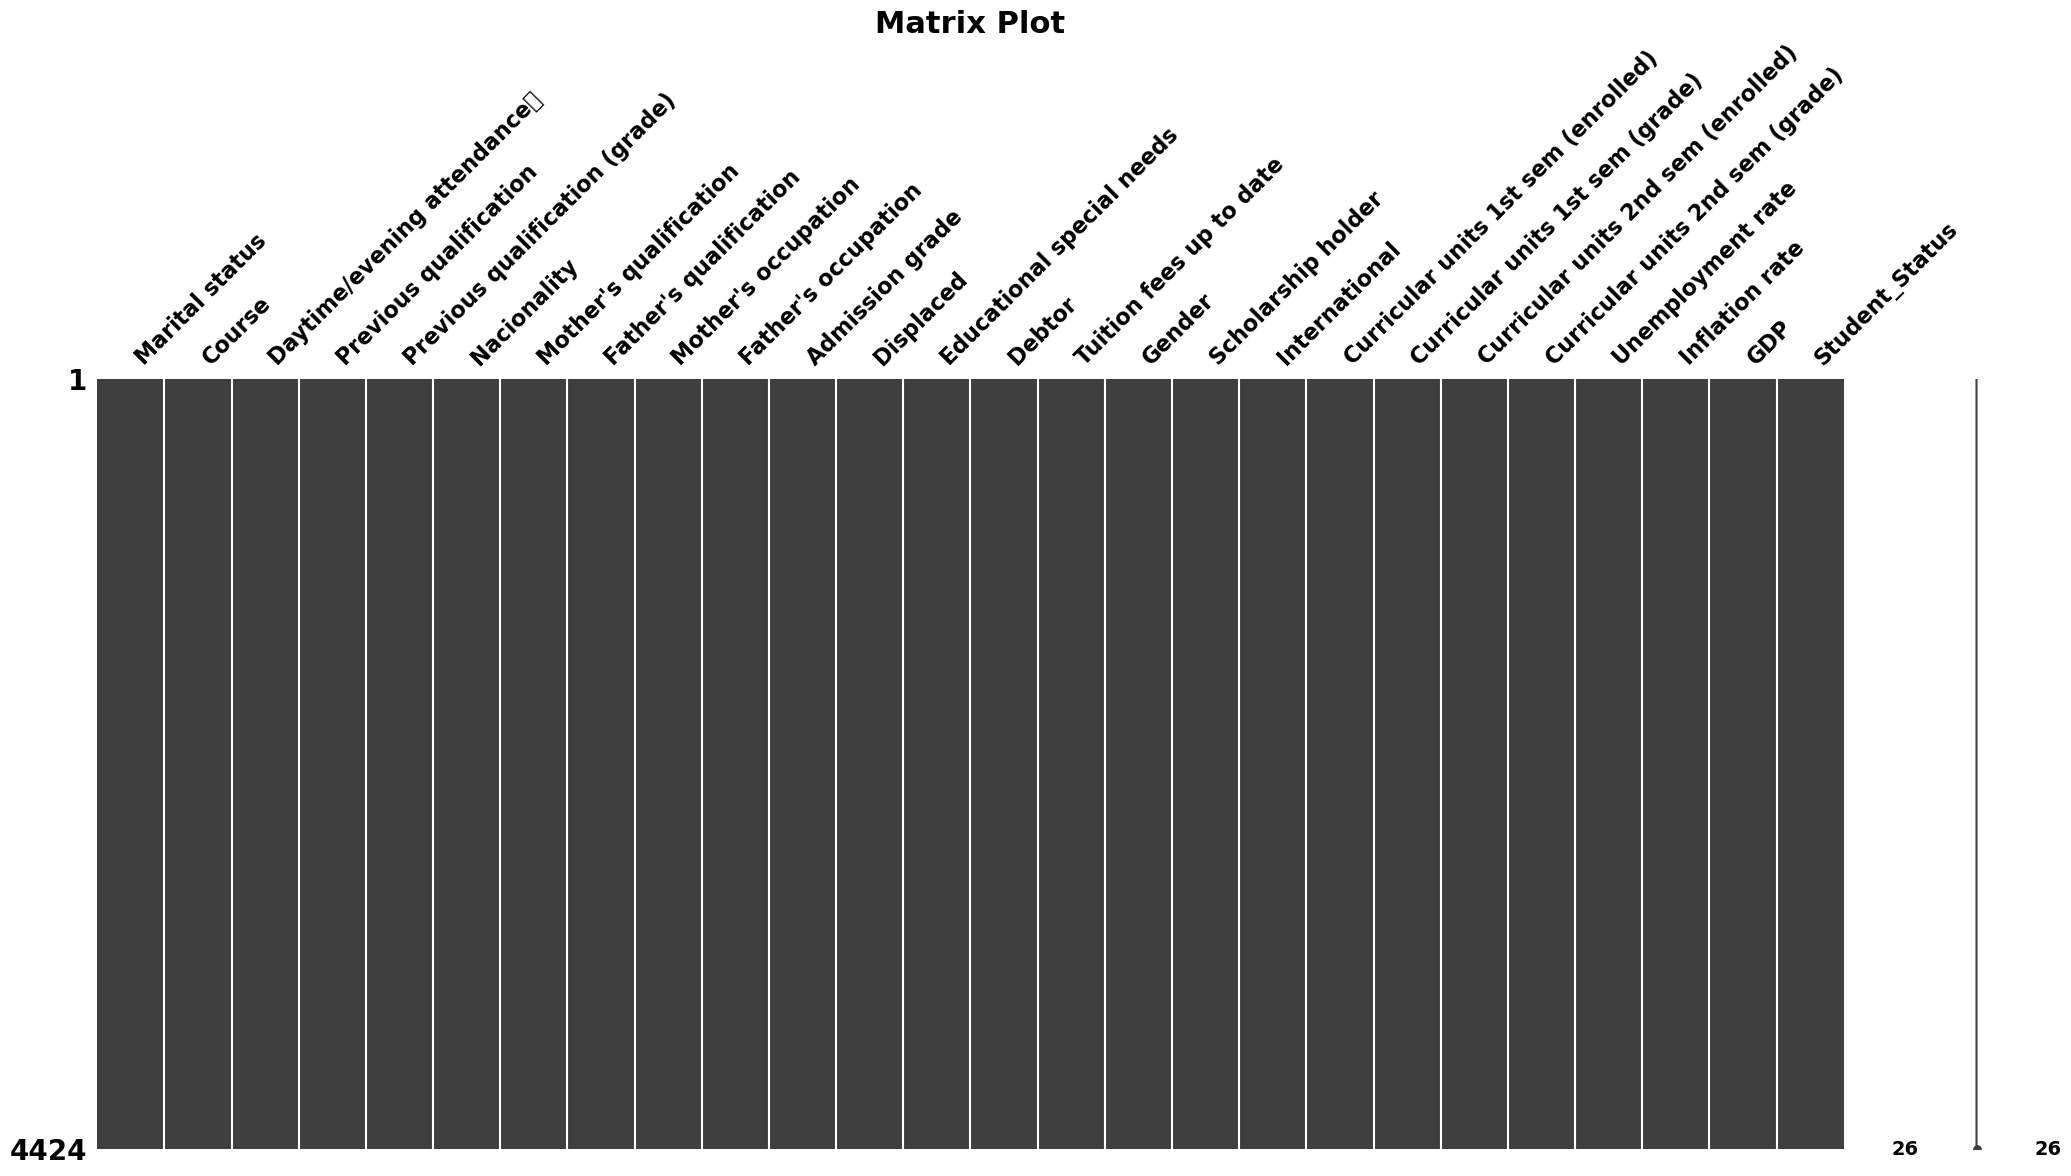

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Marital status                       4424 non-null   int64  
 1   Course                               4424 non-null   int64  
 2   Daytime/evening attendance	          4424 non-null   int64  
 3   Previous qualification               4424 non-null   int64  
 4   Previous qualification (grade)       4424 non-null   float64
 5   Nacionality                          4424 non-null   int64  
 6   Mother's qualification               4424 non-null   int64  
 7   Father's qualification               4424 non-null   int64  
 8   Mother's occupation                  4424 non-null   int64  
 9   Father's occupation                  4424 non-null   int64  
 10  Admission grade                      4424 non-null   float64
 11  Displaced                   

,Marital status,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,...,Scholarship holder,International,Curricular units 1st sem (enrolled),Curricular units 1st sem (grade),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Student_Status


In [21]:
# Finding missing/duplicate data
import matplotlib.pylab as plt
import missingno as mn

mn.matrix(df)
plt.title("Matrix Plot", fontsize=22)
plt.show()

# Find the duplicate instances (excluding the first occurrence)
idx = df.duplicated()

# Find the number of duplicate instances
num_duplicates = idx.sum()  # Sum of 'True' values gives the count of duplicates

print(num_duplicates)

# Find the rows that are duplicated (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]
df.info()

(duplicate_rows)

### Breakdown of variables

In [22]:
# Numerical Variables Summary
import numpy as np

# Change these values to floats so they're counted with the other numerical values
df['Curricular units 1st sem (enrolled)'] = df['Curricular units 1st sem (enrolled)'].astype(float)
df['Curricular units 2nd sem (enrolled)'] = df['Curricular units 2nd sem (enrolled)'].astype(float)

# Select all numerical variables
num_columns = df.select_dtypes(float)

# Get summary statistics for numerical variables
summary_stats = num_columns.describe()
print(summary_stats)

# Categorical Variables Summary
df_temp = df.copy(deep=True)
df.info()

# Select all categorical variables
c = df_temp.select_dtypes(np.integer).columns

# Change all the ints to type of category
df_temp[c] = df_temp[c].astype('category')

# Get counts, unique values, 'top' value, and the frequency of each
cat_summary = df_temp.select_dtypes('category').describe()

# "top" is the most frequent category
# "freq" is how often the most frequent category occurs

print(cat_summary)

       Previous qualification (grade)  Admission grade  \
count                     4424.000000      4424.000000   
mean                       132.613314       126.978119   
std                         13.188332        14.482001   
min                         95.000000        95.000000   
25%                        125.000000       117.900000   
50%                        133.100000       126.100000   
75%                        140.000000       134.800000   
max                        190.000000       190.000000   

       Curricular units 1st sem (enrolled)  Curricular units 1st sem (grade)  \
count                          4424.000000                       4424.000000   
mean                              6.270570                         10.640822   
std                               2.480178                          4.843663   
min                               0.000000                          0.000000   
25%                               5.000000                         11.000000 

### Dividing data into training and testing splits using 80% training and 20% testing

In [23]:
# Divide data into training and testing splits using 80% training and 20% testing split

from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Student_Status']), df['Student_Status'], test_size=0.2, random_state=42)
#  the shapes of the resulting datasets

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# encode the labels:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

On top of cleaning the data frame, we did a 80/20 split to prepare the dataset for the next step. Given the original source for this data, https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success, is a survey and we need training and testing sets to construct a model. This study used an 80/20 split for their data, so we think this is a good split for out dataset. We decided to use 80 percent of the data to make a 3539 value training set and 20 percent of the data to make a 885 value testing set. 

### Modeling

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [26]:
class BaseLogisticRegression:
    def __init__(self, eta, iterations=20, C1=0, C2=0):
        self.eta = eta,
        self.iterations = iterations,
        self.C1 = C1,
        self.C2 = C2,

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:' + str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term,

    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta)),

    def _get_gradient(self,X,y): #no regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        return gradient
    def _get_gradient_l2(self,X,y): # with l2 regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference,
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through,
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C
        return gradient
    def _get_gradient_l1(self,X,y): # with l1 regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -self.C1 * np.sign(self.w_[1:])
        return gradient
    def _get_gradient_elastic(self,X,y): # with elastic net regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel(),
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0),
        gradient = gradient.reshape(self.w_.shape),
        gradient[1:] += -2 * self.C2 * self.w_[1:] - self.C1 * np.sign(self.w_[1:]),
        return gradient

    def predict_proba(self,X,add_bias=True):
        # add bias term if requested,
        Xb = self._add_bias(X) if add_bias else X,
        return self._sigmoid(Xb @ self.w_) # return the probability y=1,

    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction


    def fit(self, X, y, regularization=None):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape

        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

        # for as many as the max iterations
        for _ in range(self.iterations):
            if regularization == None:
                gradient = self._get_gradient(Xb,y)
            elif regularization == 'l2':
                gradient = self._get_gradient_l2(Xb,y)
            elif regularization == 'l1':
                gradient = self._get_gradient_l1(Xb,y)
            elif regularization == 'elastic':
                gradient = self._get_gradient_elastic(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate
            # add bacause maximizing
        return (self.predict_proba(X)>0.5) #return the actual prediction

# Logistic Regression MSE

In [27]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.metrics import accuracy_score
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [28]:
class BaseLogisticRegression:
    def __init__(self, eta, iterations=20, C1=0, C2=0):
        self.eta = eta
        self.iterations = iterations
        self.C1 = C1
        self.C2 = C2

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term

    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta))

    def _get_gradient(self,X,y): #no regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        return gradient

    def _get_gradient_l2(self,X,y): # with l2 regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference,
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through,
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C2
        return gradient
    def _get_gradient_l1(self,X,y): # with l1 regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -self.C1 * np.sign(self.w_[1:])
        return gradient
    def _get_gradient_elastic(self,X,y): # with elastic net regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.C2 * self.w_[1:] - self.C1 * np.sign(self.w_[1:])
        return gradient

    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1

    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

    def fit(self, X, y, regularization=None):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape

        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

        # for as many as the max iterations
        for _ in range(self.iterations):
            if regularization == None:
                gradient = self._get_gradient(Xb,y)
            elif regularization == 'l2':
                gradient = self._get_gradient_l2(Xb,y)
            elif regularization == 'l1':
                gradient = self._get_gradient_l1(Xb,y)
            elif regularization == 'elastic':
                gradient = self._get_gradient_elastic(Xb,y)
            self.w_ += gradient*self.eta

In [29]:
class StochasticLogisticRegression(BaseLogisticRegression):
    # stochastic gradient calculation
    def _get_gradient(self,X,y):

        # grab a subset of samples in a mini-batch
        # and calculate the gradient according to the small batch only
        mini_batch_size = 16
        idxs = np.random.choice(len(y), mini_batch_size)

        ydiff = y[idxs]-self.predict_proba(X[idxs],add_bias=False).ravel() # get y difference (now scalar)
        gradient = np.mean(X[idxs] * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through

        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C

        return

In [30]:
from numpy.linalg import pinv
class HessianBinaryLogisticRegression(BaseLogisticRegression):
    def _get_gradient(self, X, y): #no regularization
        g = self.predict_proba(X,add_bias=False).ravel()
        hessian = X.T @ np.diag(g*(1-g)) @ X # calculate the hessian
        ydiff = y-g
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        return pinv(hessian) @ gradient

    def _get_gradient_l1(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel()
        hessian = X.T @ np.diag(g*(1-g)) @ X # calculate the hessian. 2nd derivative of abs(x) is 0, so it's the same as no regularization
        ydiff = y-g
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        #taken from gpt
        l1_der = np.sign(self.w_[1:])  # Derivative of |w| is sign(w) (ignoring the bias term)
        gradient[1:] += -self.C1 * l1_der  # Regularization is added to the gradient
        return pinv(hessian) @ gradient


    def _get_gradient_l2(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C2 # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C2
        return pinv(hessian) @ gradient


    def _get_gradient_elastic(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel()
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C2
        ydiff = y-g
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        l1_der = np.sign(self.w_[1:])
        gradient[1:] += -self.C1 * l1_der
        gradient[1:] += -2 * self.C2 * self.w_[1:]
        return pinv(hessian) @ gradient

In [31]:
class LogisticRegression:
    def __init__(self, eta, iterations=20,
                C1=0.0001,
                C2=0.0001,
                solver="steep_desc", regularization=None):
        self.eta = eta
        self.iterations = iterations
        self.C1 = C1
        self.C2 = C2
        self.solver = solver
        self.classifiers_ = []
        self.regularization = regularization
    # internally we will store the weights as self.w_ to keep with sklearn conventions

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.sort(np.unique(y)) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = []
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = np.array(y==yval).astype(int) # create a binary problem
            # train the binary classifier for this class

            if self.solver == "steep_desc":
                hblr = BaseLogisticRegression(iterations=self.iterations,eta=self.eta,C1=self.C1,C2=self.C2)
            elif self.solver == "stochastic":
                hblr = StochasticLogisticRegression(iterations=self.iterations,eta=self.eta,C1=self.C1,C2=self.C2)
            elif self.solver == "newton":
                hblr = HessianBinaryLogisticRegression(iterations=self.iterations,eta=self.eta,C1=self.C1,C2=self.C2)
            hblr.fit(X,y_binary, regularization=self.regularization)
            # add the trained classifier to the list
            self.classifiers_.append(hblr)

        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T


    def predict_proba(self,X):
        probs = []
        for hblr in self.classifiers_:
            probs.append(hblr.predict_proba(X).reshape((len(X),1))) # get probability for each classifier

        return np.hstack(probs) # make into single matrix

    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

# Logistic Regression Compare

In [32]:
# Define the range of C1 and C2 values to test
C1_values = [0.0001, 0.001, 0.01, 0.1, 1]
C2_values = [0.0001, 0.001, 0.01, 0.1, 1]

# Define the solvers to test
solvers = ["steep_desc", "stochastic", "newton"]

# Initialize a dictionary to store the results
results = {}

# Iterate over each solver
for solver in solvers:
    results[solver] = {}
    # Iterate over each combination of C1 and C2
    for C1 in C1_values:
        for C2 in C2_values:
            # Initialize the logistic regression model
            model = LogisticRegression(eta=0.01, iterations=100, C1=C1, C2=C2, solver=solver, regularization='elastic')
            # Fit the model on the training data
            model.fit(X_train, y_train)
            # Predict on the test data
            y_pred = model.predict(X_test)
            # Calculate the accuracy
            accuracy = accuracy_score(y_test, y_pred)
            # Store the result
            results[solver][(C1, C2)] = accuracy

# Print the results
for solver in results:
    print(f"Results for solver: {solver}")
    for (C1, C2), accuracy in results[solver].items():
        print(f"C1: {C1}, C2: {C2} -> Accuracy: {accuracy:.4f}")

Results for solver: steep_desc
C1: 0.0001, C2: 0.0001 -> Accuracy: 0.6927
C1: 0.0001, C2: 0.001 -> Accuracy: 0.6927
C1: 0.0001, C2: 0.01 -> Accuracy: 0.6927
C1: 0.0001, C2: 0.1 -> Accuracy: 0.6915
C1: 0.0001, C2: 1 -> Accuracy: 0.6847
C1: 0.001, C2: 0.0001 -> Accuracy: 0.6927
C1: 0.001, C2: 0.001 -> Accuracy: 0.6927
C1: 0.001, C2: 0.01 -> Accuracy: 0.6927
C1: 0.001, C2: 0.1 -> Accuracy: 0.6915
C1: 0.001, C2: 1 -> Accuracy: 0.6847
C1: 0.01, C2: 0.0001 -> Accuracy: 0.6904
C1: 0.01, C2: 0.001 -> Accuracy: 0.6893
C1: 0.01, C2: 0.01 -> Accuracy: 0.6893
C1: 0.01, C2: 0.1 -> Accuracy: 0.6893
C1: 0.01, C2: 1 -> Accuracy: 0.6768
C1: 0.1, C2: 0.0001 -> Accuracy: 0.6723
C1: 0.1, C2: 0.001 -> Accuracy: 0.6723
C1: 0.1, C2: 0.01 -> Accuracy: 0.6712
C1: 0.1, C2: 0.1 -> Accuracy: 0.6667
C1: 0.1, C2: 1 -> Accuracy: 0.6249
C1: 1, C2: 0.0001 -> Accuracy: 0.4723
C1: 1, C2: 0.001 -> Accuracy: 0.4723
C1: 1, C2: 0.01 -> Accuracy: 0.4723
C1: 1, C2: 0.1 -> Accuracy: 0.4712
C1: 1, C2: 1 -> Accuracy: 0.4712
Resu

In [33]:

best_solver = None
best_params = None
best_accuracy = 0

for solver in results:
    for params, accuracy in results[solver].items():
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_solver = solver
            best_params = params

print(f"Best Solver: {best_solver}")
print(f"Best Parameters: C1={best_params[0]}, C2={best_params[1]}")
print(f"Best Accuracy: {best_accuracy:.4f}")

Best Solver: steep_desc
Best Parameters: C1=0.0001, C2=0.0001
Best Accuracy: 0.6927


In [34]:
import seaborn as sns

import matplotlib.pyplot as plt

# Prepare data for heatmap
heatmap_data = []
for solver in results:
    for (C1, C2), accuracy in results[solver].items():
        heatmap_data.append([solver, C1, C2, accuracy])

heatmap_df = pd.DataFrame(heatmap_data, columns=['Solver', 'C1', 'C2', 'Accuracy'])

# Pivot the data for heatmap
heatmap_pivot = heatmap_df.pivot("C1", "C2", "Accuracy")

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt=".4f", cmap="YlGnBu")
plt.title("Accuracy Comparison of Different Solvers and Parameters")
plt.xlabel("C2")
plt.ylabel("C1")
plt.show()

TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

From the graph we can see that the parameters of C1=0.0001, C2=0.0001 give us the best accuracy amongst all the solvers.



The data is split into training and testing sets using an 80/20 split. The grid search is performed on the training set, and the best parameters are selected based on the validation performance. The final evaluation is done on the test set, which was not used during the grid search process, therefore, this approach is justified because it minimizes the risk of data snooping and ensures that the selected parameters generalize well to unseen data.


# Logistic Regression MSE

In [21]:
import numpy as np

class BaseLogisticRegression:
    def __init__(self, eta, iterations=20, C1=0, C2=0):
        self.eta = eta
        self.iterations = iterations
        self.C1 = C1
        self.C2 = C2

    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'

    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term

    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta))

    def set_weights(self, weights):
        self.w_ = weights

    def _get_gradient(self,X,y): #no regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        return gradient

    def _get_gradient_l2(self,X,y): # with l2 regularization,
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference,
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through,
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.w_[1:] * self.C2
        return gradient
    def _get_gradient_l1(self,X,y): # with l1 regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -self.C1 * np.sign(self.w_[1:])
        return gradient
    def _get_gradient_elastic(self,X,y): # with elastic net regularization
        ydiff = y-self.predict_proba(X,add_bias=False).ravel()
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(self.w_.shape)
        gradient[1:] += -2 * self.C2 * self.w_[1:] - self.C1 * np.sign(self.w_[1:])
        return gradient

    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1

    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction

    def fit(self, X, y, regularization=None):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape

        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

        # for as many as the max iterations
        for _ in range(self.iterations):
            if regularization == None:
                gradient = self._get_gradient(Xb,y)
            elif regularization == 'l2':
                gradient = self._get_gradient_l2(Xb,y)
            elif regularization == 'l1':
                gradient = self._get_gradient_l1(Xb,y)
            elif regularization == 'elastic':
                gradient = self._get_gradient_elastic(Xb,y)
            self.w_ += gradient*self.eta


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# mse function 1/2 * sum(y - y^)^2
def mse(w, X, y):
    predictions = sigmoid(X @ w)
    error = y - predictions
    return .5 * np.sum(error ** 2)


# gradient function derived from MSE J(w) = −X.T(y - y^)
def gradient(w, X, y):
    predictions = sigmoid(X @ w)
    error = y - predictions
    gradient = -X.T @ error
    return gradient

# hessian matrix H(w) = X.T SX where S= diagonal matrix y^ i(1 - y^ i)
def hessian(w, X, y):
    predictions = sigmoid(X @ w)
    S = np.diag(predictions * (1 - predictions))
    return X.T @ S @ X

# w_new = w - H(w)^-1 J(w)
def newtons(X, y, tol = 1e-5, iteration = 100):
    w = np.zeros(X.shape[1])

    for i in range(iteration):
        grad = gradient(w, X, y)
        hess = hessian(w, X, y)

        w_new = w - np.linalg.inv(hess) @ grad

        if np.linalg.norm(w_new - w) < tol:
            print(f"Converegd in {i} iterations")
            break
        w = w_new
    return w

X = X_train.copy()
y = y_train.copy()



#X = np.array(X_df.values, dtype=float)
#y = np.array(y_df.values, dtype=float)

weights = newtons(X, y)

print("weights:", weights)

log_reg = BaseLogisticRegression(eta=0.01, iterations=100)
log_reg.set_weights(weights)
#y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Converegd in 11 iterations
weights: [-2.61303523e-01 -1.26962641e+01  6.87209942e-01 -2.45851267e-01
 -9.94853530e-01 -3.22620009e+00 -2.88079095e+00 -2.89081178e-01
  1.89136171e+01 -5.81575421e-02 -7.98964232e-01 -1.11832678e+00
 -2.25030859e-02  1.82495207e-01  8.52730204e+00 -5.65914553e-01
 -6.88762806e-01  4.76156165e+00  2.93287489e+00  1.83085681e+00
 -6.12758532e+00  2.83075180e+01 -2.02194427e+00 -2.38513171e-01
 -7.42519485e-01]
Accuracy: 0.6904


Through research we found that MSE is not commonly used for logistic regression as it does not take into account the probablistic interpretation of the output. MLE is preferred because it provides a better fit for classification tasks which ensures that output probablities are modeled correctly. In doing this it was easier to follow derivations from the MSE to the gradient and finally the Hessian which made it eaiser to understand. Despite this if what we have researched is true then MLE is the preffered method since it yields more accurate results.